## Index No - 190621M
## Name - K. Thanushan 

## EN2550 Assignment 02
## Fitting and alignment

### Question 1:- RANSAC Implementation

In [8]:
import numpy as np
from scipy.optimize import minimize
from scipy import linalg

np.random.seed(0)
N = 100
half_n = N//2
r = 10
s = r/16
t = np.random.uniform(0, 2*np.pi, half_n)
n = s*np.random.randn(half_n)
x, y = (r + n) * np.cos(t), (r + n)*np.sin(t)
X_circ = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))
m, b = -1, 2
x = np.linspace(-12, 12, half_n)
y = m*x + b + s*np.random.randn(half_n)
X_line = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))
X = np.vstack((X_circ, X_line))



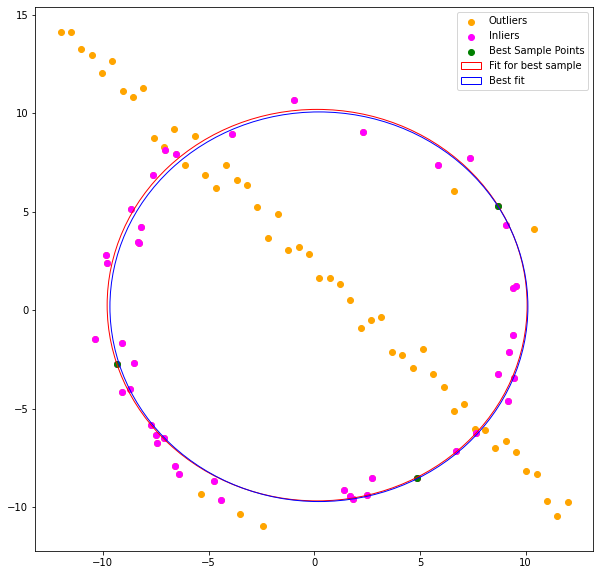

In [15]:
import matplotlib.pyplot as plt
def RANSAC_fit(X,n):
    t = 1
    N = np.inf
    Bestfit = None
    Inliers = []
    sample_points =[] 
    p = 0.99 #probability 𝑝, at least one random sample is free from outliers 
    iterations = 0
    min_s = 3 #Minimum no of points required to find the equation of the circle
    e = 0.5 #Outlier ratio 0.5 was taken for the worst case
    N = np.log(1-p)/np.log(1-(1-e)**min_s)  #calculation of samples
    while N > iterations:
        random_indices= np.random.randint(n, size=min_s)
        point1, point2, point3 = X[random_indices]
        
        #Calculation of the center coordinates and the radius of the circle passing through the sample points
        coefficientMatrix = np.array([[point2[0] - point1[0], point2[1] - point1[1]], [point3[0] - point1[0], point3[1] - point1[1]]]) 
        constantMatrix = np.array([[point2[0]**2 - point1[0]**2 + point2[1]**2 - point1[1]**2], [point3[0]**2 - point1[0]**2 + point3[1]**2 - point1[1]**2]])		
        invCoefficientMatrix = np.linalg.pinv(coefficientMatrix)

        center_x, center_y = (invCoefficientMatrix@constantMatrix) / 2
        center_x, center_y = center_x[0], center_y[0]
        r = np.sqrt((point1[0]- center_x)**2 + (point1[1] - center_y)**2)

        Inlier_test = []
        #Checking for inliers and appending them into the inlier set.
        for x, y in X:
            dis = np.sqrt((x - center_x)**2 + (y - center_y)**2)
            if (np.abs(dis - r) < t):
                Inlier_test.append([x,y])

        #Checking whether the number of current inliers is greater than the past inliers
        if (len(Inlier_test) > len(Inliers)):
            Bestfit = [center_x, center_y, r] #Getting the center coordinates and radius of the best fit circle
            Inliers = Inlier_test
            sample_points = [point1, point2, point3]  #Collecting the sample points of the best fit
        iterations+=1
    return Bestfit, Inliers, sample_points

Bestfit, Inliers, sample_points = RANSAC_fit(X_circ, X_circ.shape[0])
center_x, center_y, r = Bestfit[0], Bestfit[1], Bestfit[2]
Inliers = np.array(Inliers)

Bestfit2, Inliers2, sample_points2 = RANSAC_fit(Inliers, Inliers.shape[0])
center_x2, center_y2, r2 = Bestfit2[0], Bestfit2[1], Bestfit2[2]


fig, ax = plt.subplots(1, 1, figsize = (10,10))
ax.scatter(X[:, 0], X[:, 1], c='orange', marker='o', label='Outliers')
ax.scatter(Inliers[:, 0], Inliers[:, 1], c='magenta', marker='o', label='Inliers')
ax.scatter([sample_points[0][0], sample_points[1][0], sample_points[2][0]], [sample_points[0][1], sample_points[1][1], sample_points[2][1]], c='green', marker='o', label='Best Sample Points')
circle = plt.Circle((center_x, center_y), radius=r, color='r', fc='y', fill=False, label = 'Fit for best sample')
plt.gca().add_patch(circle)
circle2 = plt.Circle((center_x2, center_y2), radius=r2, color='b', fc='y', fill=False, label = 'Best fit')
plt.gca().add_patch(circle2)
plt.legend()
plt.show()

### Question 2:- Image Warping and Blending by calculating a hormography

### Questiom 3:- Stitching Two Images by computing a hormography using RANSAC 